In [1]:
import awkward as ak
import numpy as np
import coffea
import os
from plugins import handleData

print(coffea.__version__)
from coffea import util
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import hist

testFiles = [
"root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_170to300_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/120000/0CDD30E0-B953-E54B-BB7A-BFB45BE6EC93.root",
"root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_300to470_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/120000/3788BBD3-3B70-BE48-B01A-4FA395E1E0B6.root",
"root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_470to600_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/F6B6A983-3E2B-7B4D-A2CE-E03AB6E32387.root",
"root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_600to800_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/FDF7FBE4-9226-994A-BD45-29995A3CD62F.root",
"root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_800to1000_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/2CEB03D7-5B1A-EE46-9C21-13ED3E349AF4.root",
"root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/DB87A517-0584-1A41-BB18-AAE7C9AAE5B8.root",
"root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/BFE2E7E9-82CB-FE47-9B43-EBA5C373AF60.root",
"root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/5213B536-BAA1-CC43-A58A-B1E41E2680F5.root",
"root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/E8400F91-3216-EA46-A9F1-8CC7EF5261B0.root",
"root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/B21BFDD8-B878-784C-AFB6-5CDE131F5C39.root"
]

# redirector = 'root://xcache/'
# redirector='root://cmsxrootd.fnal.gov/'
# files = handleData('fileset_QCD.json', redirector, testing = True, data = False)
# # files_test = handleData('fileset_QCD.json', redirector, testing = False, data = False)

# events = NanoEventsFactory.from_root(list(files.values())[9][0], schemaclass=NanoAODSchema).events()
# print(files)
#may have to put in weights by hand
# print(events.Generator.weight)

0.7.21


In [3]:
from plugins import *
from dijetProcessor import makeDijetHists
from dask.distributed import Client
import pickle
#### WE'RE MISSING 2016B ver2 -- AK8 PF HLT is missing need to use AK4 trigger isntead

data_bool = True
winterfell = False
dask = True
testing = True
processor = makeDijetHists(data = data_bool)
datastring = "JetHT" if processor.do_gen == False else "QCDsim"
if processor.do_gen==True and winterfell:
    filename = "QCD_flat_files.json"
elif processor.do_gen==True:
    filename = "fileset_QCD.json"
else:
    filename = "datasets_UL_NANOAOD.json"
if testing:
    fname = 'coffeaOutput/dijetHistsTest_{}_{}_{}_NewHist.pkl'.format(datastring, processor.ptcut, processor.etacut)
else:
    fname = 'coffeaOutput/dijetHists_{}_{}_{}_NewHist.pkl'.format(datastring, processor.ptcut, processor.etacut)

Data:  True  gen  False


In [5]:
result = runCoffeaJob(processor, jsonFile = filename, winterfell = winterfell, testing = testing, dask = False, data = not processor.do_gen)
with open(fname, "wb") as f:
    pickle.dump( result, f)

Era:  -UL2016
Era:  HIPM_UL2016
Era:  UL2017
Era:  UL2018
dataset =  /JetHT/Run2016B-ver1_HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2016C-HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2016D-HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2016E-HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2016F-HIPM_UL2016_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2016F-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2016H-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2017B-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2017C-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2017D-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2017E-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2017F-UL2017_MiniAODv2_NanoAODv9-v1/NANOAOD
dataset =  /JetHT/Run2018A-UL2018_MiniAODv2_NanoAODv9-v2/NANOAOD
dataset =  /JetHT/Run2018B-UL2018_MiniAODv2_NanoAODv9-v1/NANOAOD
Ru

Output()

Filename:  root://cmsxrootd.fnal.gov//store/data/Run2018B/JetHT/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v1/120000/02113304-6253-8A41-88DB-C3077FA2AC47.root
Lenght of events  98181 length of weights  98181
IOV  2018 , era  Run2018B
apply lumimask
call applyprescales
Trigger year  2018
Trigger: len of events  74110 len of weights  74110
[350, 3.4e+04, 1.5e+03, 3.4e+04, 3.4e+04, ... 1.05e+03, 245, 3.4e+04, 1.05e+03, 245]
Npvs  ['ndof', 'x', 'y', 'z', 'chi2', 'score', 'npvs', 'npvsGood']
Reco sel: len of events  1438 len of weights  1438
Reco kine/topo sel: len of events  1368 len of weights  1368
FatJet:  [[1.65e+03, 1.35e+03], [539, 435], [866, 718], ... 911, 834], [622, 449], [758, 682]]
Fatjet flattened along axis 0:  [1.65e+03, 1.35e+03, 539, 435, 866, 718, 754, ... 753, 911, 834, 622, 449, 758, 682]
Length of FatJet after falttenting:  1368
Filename:  root://cmsxrootd.fnal.gov//store/data/Run2018B/JetHT/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v1/120000/02113304-6253-8A41-88DB-C3077FA2AC47.root

{'jet_mass': Hist(
  StrCategory([], growth=True, name='dataset', label='Dataset'),
  StrCategory([], growth=True, name='jetNumb', label='Jet'),
  StrCategory([], growth=True, name='partonFlav', label='Parton Flavour'),
  Variable(array([0.00e+00, 5.00e-01, 1.00e+00, 3.00e+00, 5.00e+00, 7.50e+00,
       1.00e+01, 1.50e+01, 2.00e+01, 3.00e+01, 4.00e+01, 5.00e+01,
       6.00e+01, 7.00e+01, 8.00e+01, 9.00e+01, 1.00e+02, 1.25e+02,
       1.50e+02, 1.75e+02, 2.00e+02, 2.25e+02, 2.50e+02, 6.25e+02,
       1.00e+03]), name='mreco', label='m_{RECO} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0), 'jet_pt': Hist(
  StrCategory([], growth=True, name='dataset', label='Dataset'),
  StrCategory([], growth=True, name='jetNumb', label='Jet'),
  StrCategory([], growth=True, name='partonFlav', label='Parton Flavour'),
  Variable([200, 280, 360, 450, 520, 630, 690, 750, 800, 1300, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=0, vari

In [7]:
fname = 'coffeaOutput/dijetHistsTest_QCDsim_30.0_2.5.pkl'
with open(fname, "rb") as f:
    result = pickle.load( f )
# result=result[0]
import matplotlib.pyplot as plt
%matplotlib inline
#import mplhep as hep
plt.rcParams["figure.figsize"] = (10,10)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7d4fe86340>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

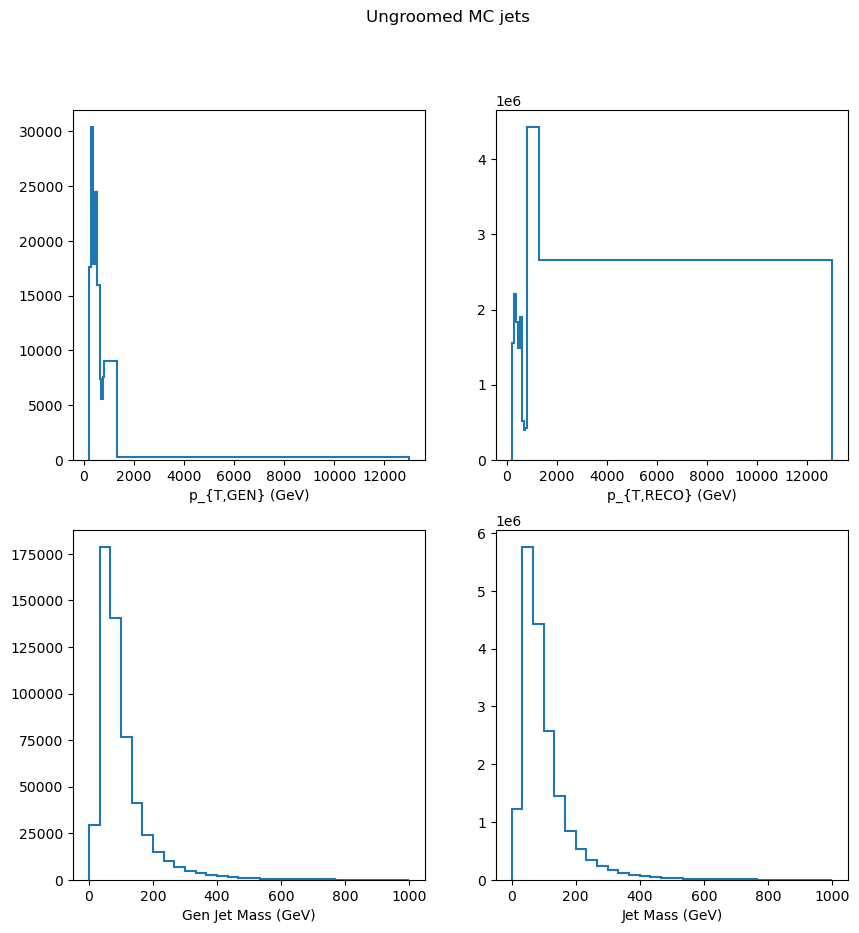

In [12]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Ungroomed MC jets')
result['response_matrix_u'][{'dataset':sum}].project('ptgen').plot1d(ax=axs[0,0], binwnorm=True)
result['response_matrix_u'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[0,1])
result['response_matrix_u'][{'dataset':sum}].project('mgen').plot1d(ax=axs[1,0], binwnorm=True)
result['response_matrix_u'][{'dataset':sum}].project('mreco').plot1d(ax=axs[1,1])

In [13]:
fname = 'coffeaOutput/dijetHistsTest_JetHT_30.0_2.5.pkl'
with open(fname, "rb") as f:
    result = pickle.load( f )
# result=result[0]
import matplotlib.pyplot as plt
%matplotlib inline
#import mplhep as hep
plt.rcParams["figure.figsize"] = (10,10)

(0.0, 1200.0)

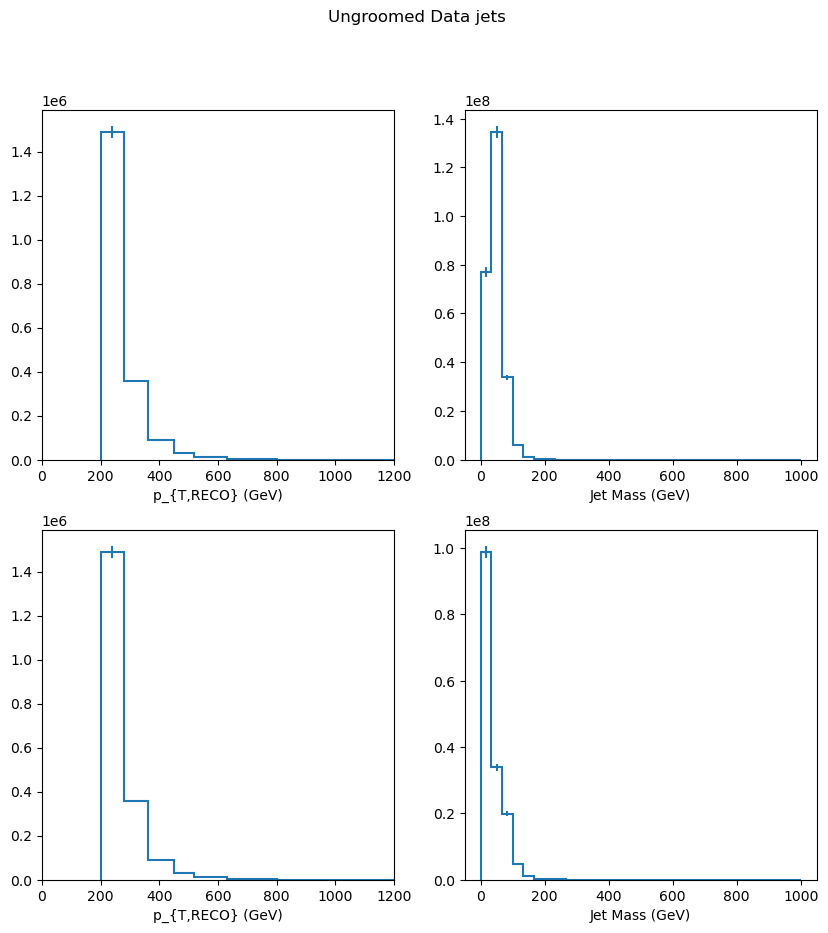

In [27]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Ungroomed Data jets')
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[0,0], binwnorm=True)
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco').plot1d(ax=axs[0,1])
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[1,0], binwnorm=True)
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco').plot1d(ax=axs[1,1])
axs[0,0].set_xlim(0,1200)
axs[1,0].set_xlim(0,1200)

[ 826192. 1070951.  817049.  632459.  720366.  185934.  142867.  150135.
 1276149.  460887.] [1560056. 2200313. 1837659. 1493595. 1898120.  512861.  394976.  416741.
 4436271. 2658622.]


Text(0.5, 0.98, 'Gluon content as a function of pT')

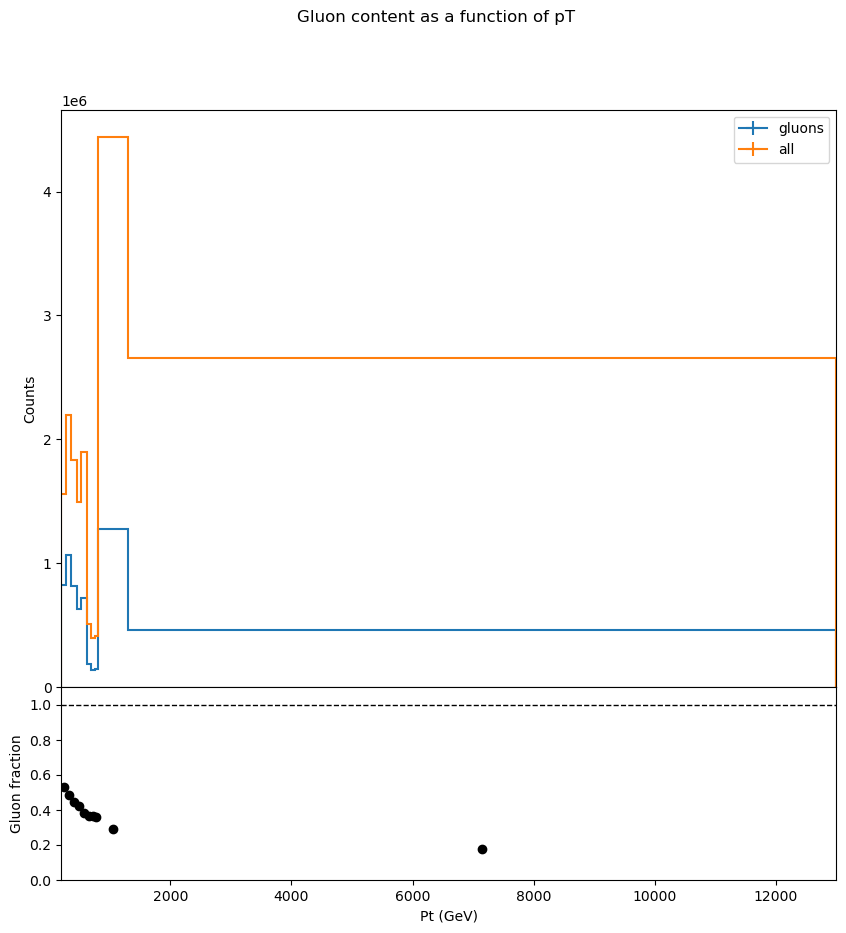

In [9]:
numerator = result['jet_pt'][{'partonFlav':'Gluon'}].project('ptreco')
denominator = result['jet_pt'].project('ptreco')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'
fig = plt.gcf()
grid = fig.add_gridspec(2, 1, hspace=0, height_ratios=[3, 1])

main_ax = fig.add_subplot(grid[0])
subplot_ax = fig.add_subplot(grid[1], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt (GeV)")
plt.ylabel("Gluon fraction")
fig.suptitle('Gluon content as a function of pT')

In [ ]:
numerator = result['jet_eta'][{'partonFlav':'Gluon'}].project('eta')
denominator = result['jet_eta'].project('eta')
print(numerator.values(), denominator.values())
numerator.label = r'$\epsilon$'
numerator.label = r'$\epsilon$'
fig = plt.gcf()
grid = fig.add_gridspec(2, 1, hspace=0, height_ratios=[3, 1])

main_axis = fig.add_subplot(grid[0])
ratio_ax = fig.add_subplot(grid[1], sharex=main_axis)
plt.setp(main_axis.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_axis,"ratio_ax":ratio_ax}
)

plt.xlabel(r'$\eta$')
plt.ylabel("Gluon fraction")
main_axis.set_title('Gluon content as a function of eta')


In [ ]:
#sum entries in bins --> plot as y-axis
plt.rcParams["figure.figsize"] = (20,5)


fig, axs = plt.subplots(1, 3)
result['jet_mass'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")

fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(2, 3)
print(result['jet_mass'])
result['jet_mass'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")
result['jet_mass'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")
fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")

In [ ]:
njets=result['cutflow']['nJets']
ngluonjets=result['cutflow']['nGluonJets']
print(result['cutflow'])
print("Gluon purity:", ngluonjets/njets)

In [ ]:
response_matrix_u_values = result['response_matrix_u'].project("ptreco", "mreco", "ptgen", "mgen").values()
response_matrix_g_values = result['response_matrix_g'].project("ptreco", "mreco", "ptgen", "mgen").values()

In [ ]:
nptreco,nmassreco,nptgen,nmassgen = response_matrix_u_values.shape

In [ ]:
response_matrix_u_final = response_matrix_u_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )
print(ak.max(response_matrix_u_final))

In [ ]:
response_matrix_g_final = response_matrix_g_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

In [ ]:
plt.figure(figsize = (40,80))
plt.imshow( np.log(response_matrix_u_final+1), aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

In [ ]:
plt.figure(figsize = (40,80))
plt.imshow( np.log(response_matrix_g_final+1), aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

In [ ]:
plt.figure(figsize = (40,80))
plt.imshow( response_matrix_u_final, aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

## 